In [406]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 파이썬을 구동하는 폴더내 엑셀파일을 저장해주어야 한다
load_filename = 'df_date_charge.csv'
data = pd.read_csv(load_filename,encoding='CP949')

In [407]:
data['날짜'] = pd.to_datetime(data['날짜'], format ='%Y-%m-%d')

In [408]:
data.rename(columns={'날짜':'측정일시'},inplace=True)

Text(0.5, 1.0, 'promissory note')

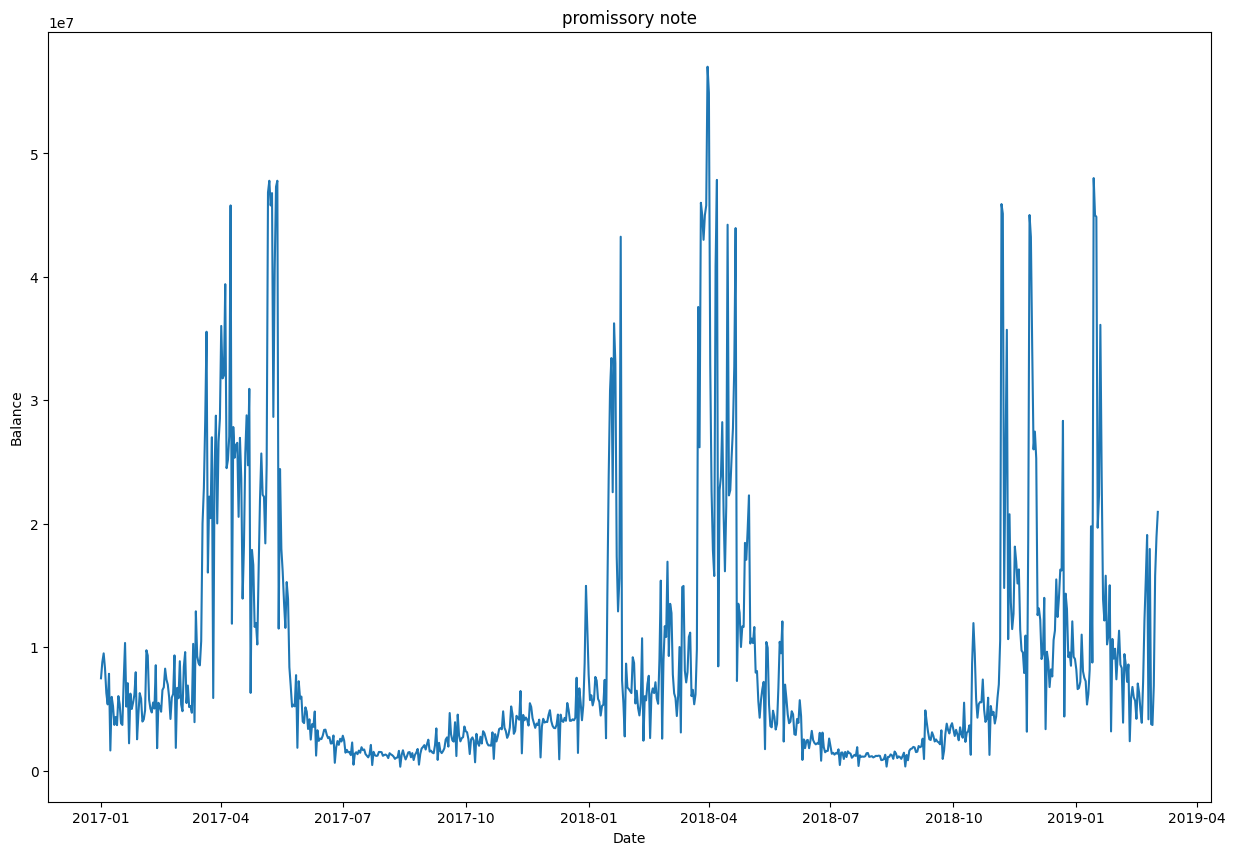

In [409]:
data_pn = data[['측정일시','금액']]
data_pn.rename(columns={'측정일시':'Date','금액':'total'}, inplace=True)


# 발행어음형 CMA 잔고 그려보기
plt.figure(figsize=(15,10))
x = data_pn['Date'].to_list()
# xlabels = data_pn['Date']
y =data_pn['total'].to_list() 
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title("promissory note")

In [410]:
from statsmodels.tsa.api import ExponentialSmoothing

In [411]:
data_pn

,Date,total
0,2017-01-01,7482160
1,2017-01-02,8796124
2,2017-01-03,9500876
3,2017-01-04,8284787
4,2017-01-05,6283747
...,...,...
787,2019-02-27,3698369
788,2019-02-28,6872981
789,2019-03-01,15795477
790,2019-03-02,18917615


In [412]:
data_pn.set_index('Date',inplace=True)

In [575]:
train = data_pn[0:620]
test = data_pn [620:]

In [576]:
y_hat = test.copy()

<AxesSubplot: xlabel='Date'>

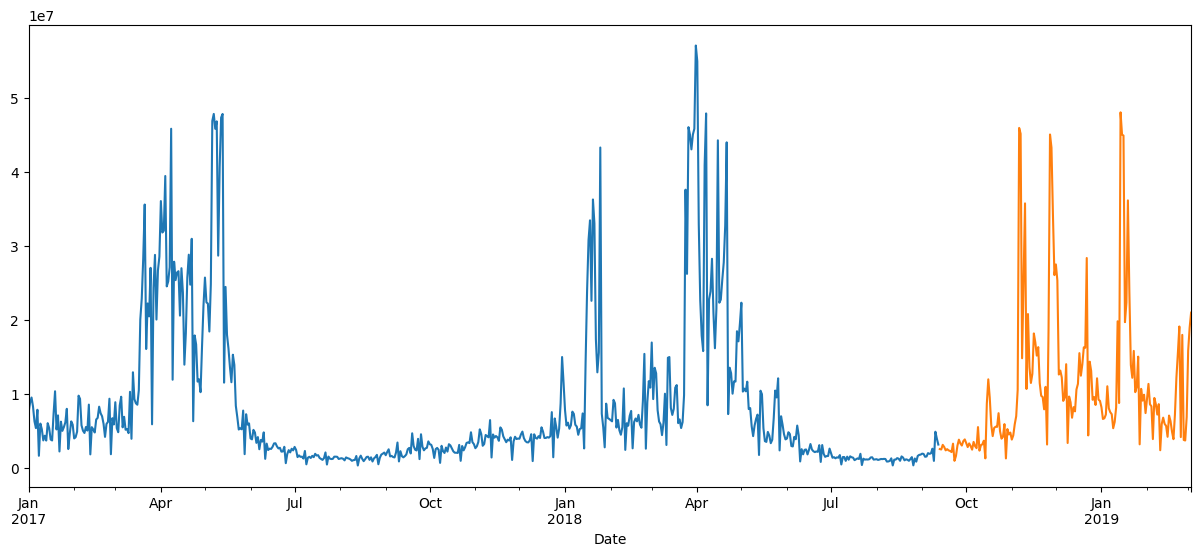

In [577]:
train['total'].plot(figsize=(15,6))
test['total'].plot()

In [583]:
# 파라미터로 seasonality 주기를 넘겨줘야함
model = ExponentialSmoothing(
  np.array(train['total']),seasonal_periods=310,
  trend='add',
  seasonal ='add'
  )

In [584]:
winter_result = model.fit()

C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [585]:
y_hat['winter']= winter_result.forecast(len(test))

In [586]:
len(test)

172

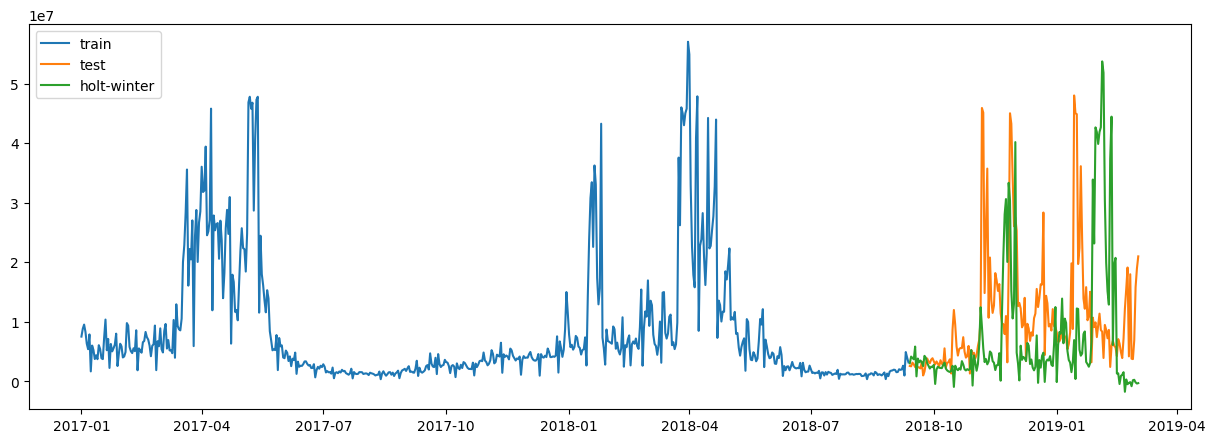

In [587]:
plt.figure(figsize=(15,5))
plt.plot(train['total'], label='train')
plt.plot(test['total'], label='test')
plt.plot(y_hat['winter'], label= 'holt-winter')
plt.legend()

In [588]:
from sklearn.metrics import mean_squared_error 

rmse= np.sqrt(mean_squared_error(test['total'],y_hat['winter']))
rmse

14601071.769830657